In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the data
DF = pd.read_csv('temperature_data.csv')
temperature_data = DF['Temperature'].values

In [3]:
# Set seed for reproducibility
np.random.seed(42)

In [4]:
# Parameters
seq_length = 10
batch_size = 32
input_dim = 1
output_dim = 1
hidden_dim = 64
num_epochs = 800

In [5]:
# Dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, i):
        x = self.data[i:i+self.seq_length]  # Sequence of data [0:30] | [1:31]
        y = self.data[i+self.seq_length]  # Target [30] | [31]
        return torch.tensor(x, dtype=torch.float32).unsqueeze(-1), torch.tensor(y, dtype=torch.float32)

In [6]:
# Prepare the dataset and dataloader
dataset = TimeSeriesDataset(temperature_data, seq_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [7]:
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, seq_length):
        super(Generator, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.tanh = nn.Tanh()

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), hidden_dim)  # Initialize hidden state
        c_0 = torch.zeros(2, x.size(0), hidden_dim)  # Initialize cell state
        lstm_out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(lstm_out)
        return self.tanh(out)

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=3, batch_first=True)  # Added extra layer
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        h_0 = torch.zeros(3, x.size(0), hidden_dim)  # Adjusted for 3 layers
        c_0 = torch.zeros(3, x.size(0), hidden_dim)
        lstm_out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(lstm_out[:, -1, :])  # Output only the last time step
        return out


In [8]:
# Custom smoothness loss to ensure smoother generated sequences
def smoothness_loss(fake_data):
    return torch.mean(torch.abs(fake_data[:, 1:, :] - fake_data[:, :-1, :]))

In [9]:
# Initialize models
generator = Generator(input_dim, hidden_dim, output_dim, seq_length)
discriminator = Discriminator(input_dim, hidden_dim)

# Loss function and optimizers
criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0001)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0001)

Epoch [1/800] Loss D: 1.3864, Loss G: 0.6957


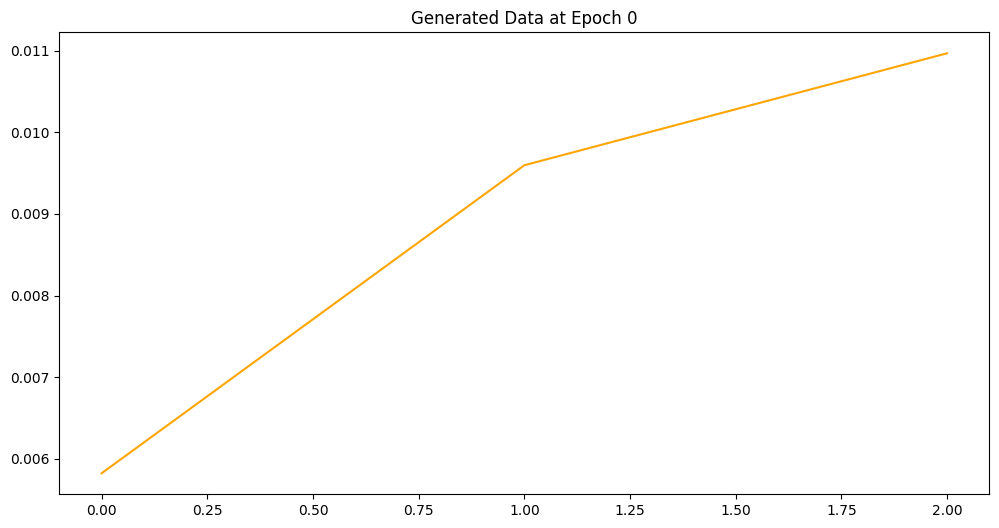

Epoch [11/800] Loss D: 1.3861, Loss G: 0.6933
Epoch [21/800] Loss D: 1.3861, Loss G: 0.6936
Epoch [31/800] Loss D: 1.3853, Loss G: 0.6942
Epoch [41/800] Loss D: 1.3817, Loss G: 0.6979
Epoch [51/800] Loss D: 1.3189, Loss G: 0.8049
Epoch [61/800] Loss D: 0.7141, Loss G: 1.3551
Epoch [71/800] Loss D: 1.5989, Loss G: 1.0722
Epoch [81/800] Loss D: 1.3787, Loss G: 1.0461
Epoch [91/800] Loss D: 1.1389, Loss G: 1.3049
Epoch [101/800] Loss D: 0.6155, Loss G: 1.9932


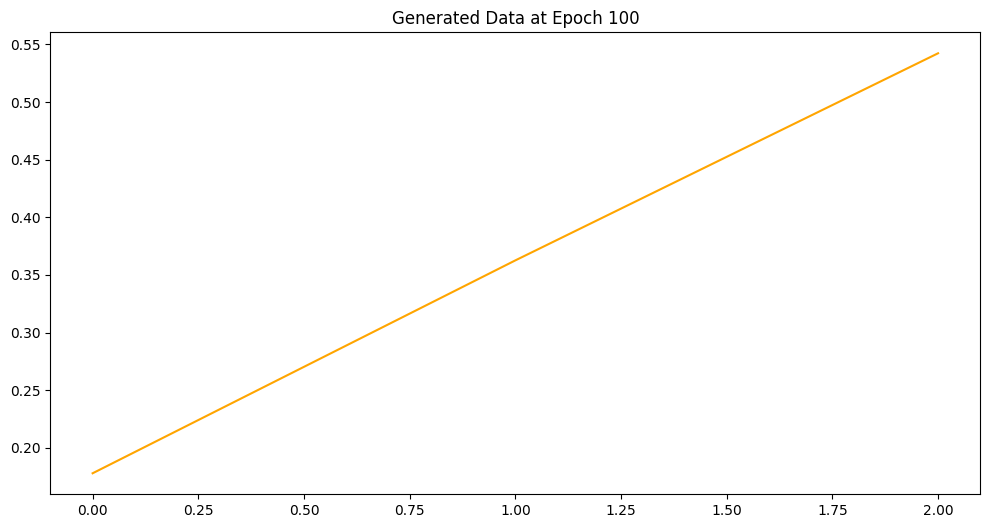

Epoch [111/800] Loss D: 0.6654, Loss G: 2.1560
Epoch [121/800] Loss D: 0.8278, Loss G: 1.6987
Epoch [131/800] Loss D: 1.1249, Loss G: 1.2377
Epoch [141/800] Loss D: 0.8749, Loss G: 1.3153
Epoch [151/800] Loss D: 1.2752, Loss G: 1.1340
Epoch [161/800] Loss D: 1.2716, Loss G: 1.1429
Epoch [171/800] Loss D: 1.2479, Loss G: 1.0832
Epoch [181/800] Loss D: 1.2339, Loss G: 0.9852
Epoch [191/800] Loss D: 1.2125, Loss G: 0.8908
Epoch [201/800] Loss D: 1.2426, Loss G: 0.9017


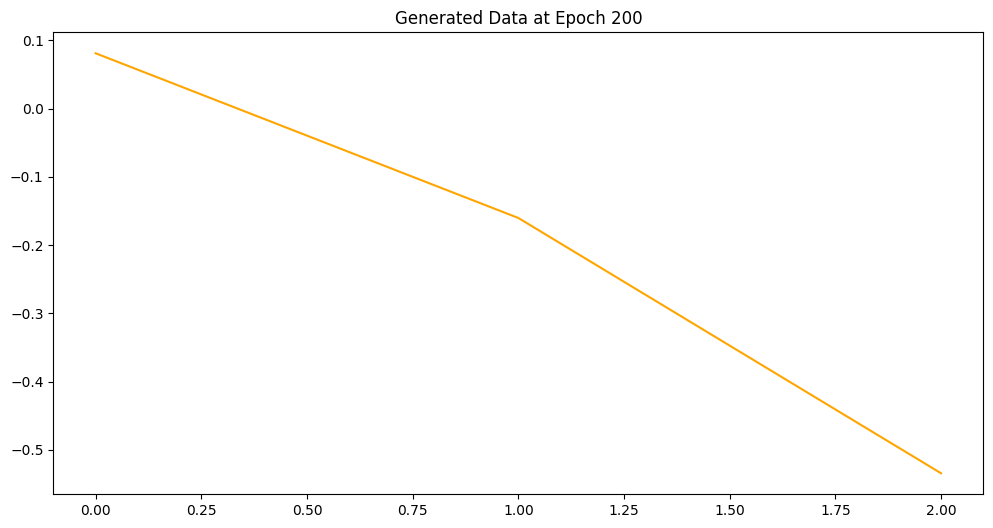

Epoch [211/800] Loss D: 1.2256, Loss G: 0.8684
Epoch [221/800] Loss D: 1.2368, Loss G: 0.8616
Epoch [231/800] Loss D: 1.2529, Loss G: 0.8571
Epoch [241/800] Loss D: 1.2541, Loss G: 0.8402
Epoch [251/800] Loss D: 1.2604, Loss G: 0.8276
Epoch [261/800] Loss D: 1.2563, Loss G: 0.8259
Epoch [271/800] Loss D: 1.2716, Loss G: 0.8160
Epoch [281/800] Loss D: 1.2768, Loss G: 0.8133
Epoch [291/800] Loss D: 1.3033, Loss G: 0.7961
Epoch [301/800] Loss D: 1.3500, Loss G: 0.7800


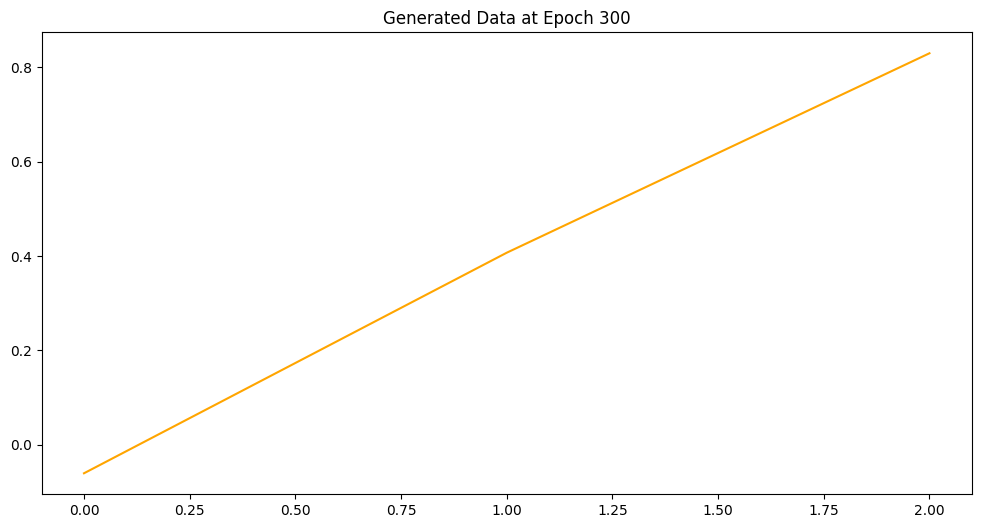

Epoch [311/800] Loss D: 1.3571, Loss G: 0.7550
Epoch [321/800] Loss D: 1.3596, Loss G: 0.7503
Epoch [331/800] Loss D: 1.3637, Loss G: 0.7406
Epoch [341/800] Loss D: 1.3640, Loss G: 0.7363
Epoch [351/800] Loss D: 1.3599, Loss G: 0.7358
Epoch [361/800] Loss D: 1.3593, Loss G: 0.7321
Epoch [371/800] Loss D: 1.3475, Loss G: 0.7368
Epoch [381/800] Loss D: 1.3333, Loss G: 0.7461
Epoch [391/800] Loss D: 1.3222, Loss G: 0.7559
Epoch [401/800] Loss D: 1.2915, Loss G: 0.7786


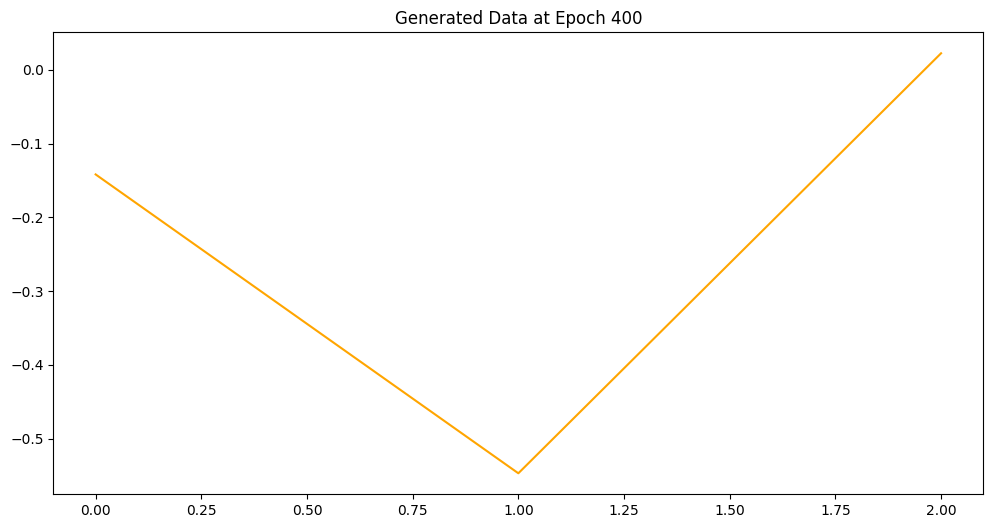

Epoch [411/800] Loss D: 1.2687, Loss G: 0.7887
Epoch [421/800] Loss D: 1.2147, Loss G: 0.8233
Epoch [431/800] Loss D: 1.1195, Loss G: 0.8984
Epoch [441/800] Loss D: 1.0349, Loss G: 0.9961
Epoch [451/800] Loss D: 1.0704, Loss G: 1.0619
Epoch [461/800] Loss D: 1.1232, Loss G: 0.9335
Epoch [471/800] Loss D: 1.1172, Loss G: 0.9837
Epoch [481/800] Loss D: 1.1607, Loss G: 0.9964
Epoch [491/800] Loss D: 1.1734, Loss G: 0.9318
Epoch [501/800] Loss D: 1.1920, Loss G: 0.8954


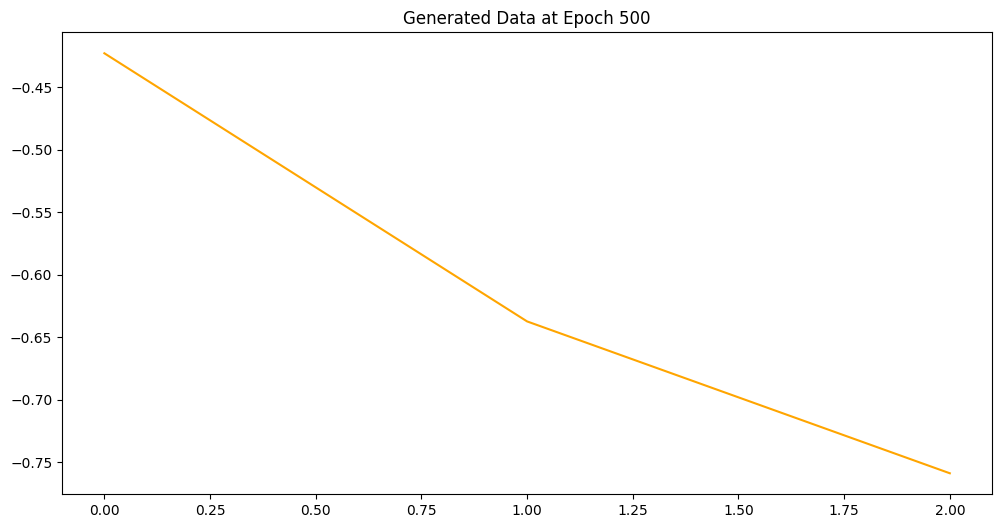

Epoch [511/800] Loss D: 1.1650, Loss G: 0.8399
Epoch [521/800] Loss D: 1.1926, Loss G: 0.8931
Epoch [531/800] Loss D: 1.2325, Loss G: 0.8660
Epoch [541/800] Loss D: 1.2683, Loss G: 0.8311
Epoch [551/800] Loss D: 1.3006, Loss G: 0.8061
Epoch [561/800] Loss D: 1.3252, Loss G: 0.7904
Epoch [571/800] Loss D: 1.3676, Loss G: 0.7495
Epoch [581/800] Loss D: 1.3674, Loss G: 0.7312
Epoch [591/800] Loss D: 1.3622, Loss G: 0.7314
Epoch [601/800] Loss D: 1.3682, Loss G: 0.7135


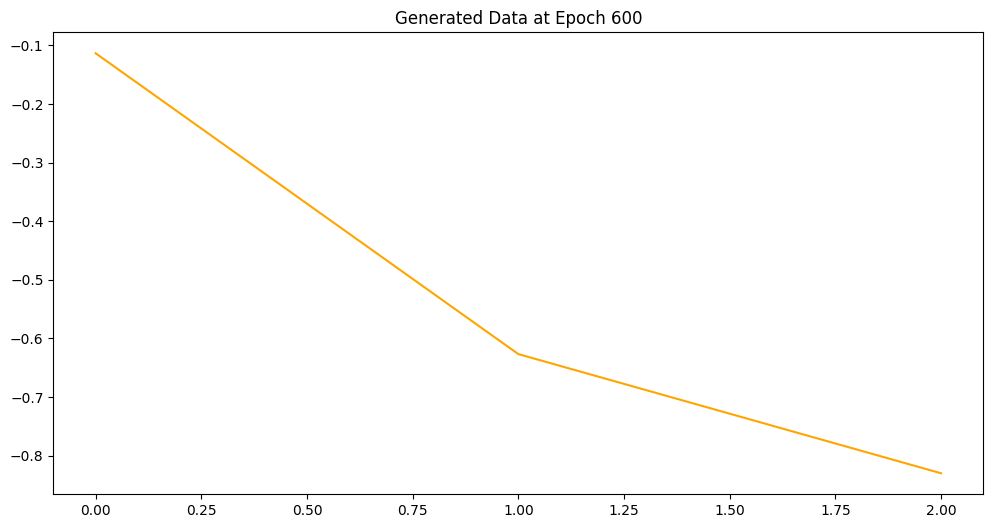

Epoch [611/800] Loss D: 1.3667, Loss G: 0.7193
Epoch [621/800] Loss D: 1.3769, Loss G: 0.7233
Epoch [631/800] Loss D: 1.3659, Loss G: 0.7212
Epoch [641/800] Loss D: 1.3847, Loss G: 0.7191
Epoch [651/800] Loss D: 1.3700, Loss G: 0.7117
Epoch [661/800] Loss D: 1.3819, Loss G: 0.7099
Epoch [671/800] Loss D: 1.3847, Loss G: 0.7172
Epoch [681/800] Loss D: 1.3789, Loss G: 0.7309
Epoch [691/800] Loss D: 1.3709, Loss G: 0.6901
Epoch [701/800] Loss D: 1.3949, Loss G: 0.7236


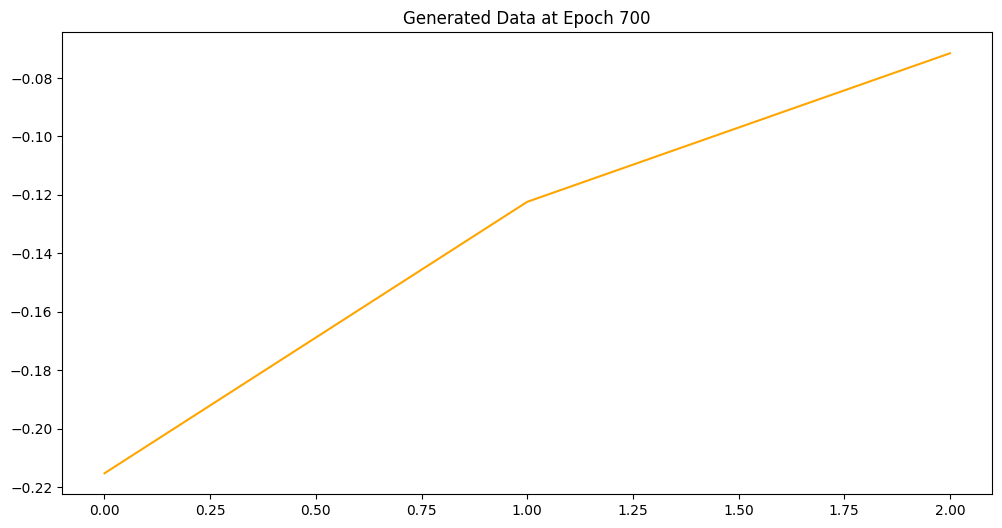

Epoch [711/800] Loss D: 1.4138, Loss G: 0.7064
Epoch [721/800] Loss D: 1.3920, Loss G: 0.7094
Epoch [731/800] Loss D: 1.3946, Loss G: 0.7001
Epoch [741/800] Loss D: 1.3837, Loss G: 0.7128
Epoch [751/800] Loss D: 1.3873, Loss G: 0.7060
Epoch [761/800] Loss D: 1.3670, Loss G: 0.7013
Epoch [771/800] Loss D: 1.3814, Loss G: 0.7033
Epoch [781/800] Loss D: 1.3886, Loss G: 0.7045
Epoch [791/800] Loss D: 1.3800, Loss G: 0.7120


In [10]:
# Training loop
for epoch in range(num_epochs):
    g_loss_epoch = 0
    d_loss_epoch = 0

    for real_batch, _ in dataloader:
        batch_size = real_batch.size(0)

        # Create real and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train the Discriminator
        d_optimizer.zero_grad()

        # Real data discriminator output
        real_output = discriminator(real_batch)
        d_loss_real = criterion(real_output, real_labels)

        # Use real data with added noise as input for the generator
        real_data_input = real_batch + torch.randn(batch_size, seq_length, input_dim) * 0.1
        fake_data = generator(real_data_input)
        fake_output = discriminator(fake_data)
        d_loss_fake = criterion(fake_output, fake_labels)

        # Total discriminator loss and backward pass
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

        # Train the Generator
        g_optimizer.zero_grad()

        # Generate fake data and get discriminator's output
        fake_data = generator(real_data_input)
        fake_output = discriminator(fake_data)

        # Generator loss with added smoothness loss
        g_loss = criterion(fake_output, real_labels) + 0.1 * smoothness_loss(fake_data)

        # Backpropagation for generator
        g_loss.backward()
        g_optimizer.step()

        g_loss_epoch += g_loss.item()
        d_loss_epoch += d_loss.item()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss D: {d_loss_epoch/len(dataloader):.4f}, Loss G: {g_loss_epoch/len(dataloader):.4f}")

    # Plot generated data at regular intervals
    if epoch % 100 == 0:
        noise = torch.randn(batch_size, seq_length, input_dim)
        generated_sample = generator(noise).detach().numpy().flatten()[:batch_size]
        plt.figure(figsize=(12, 6))
        plt.plot(generated_sample, label='Generated Data', color='orange')
        plt.title(f'Generated Data at Epoch {epoch}')
        plt.show()

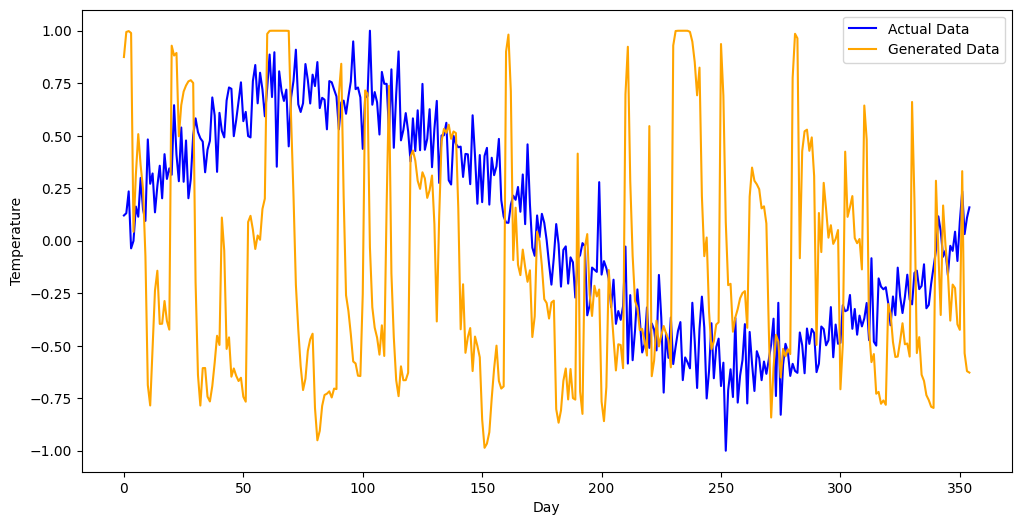

In [11]:
# Final data generation and plotting
num_sequences = len(temperature_data) - seq_length
noise = torch.randn(num_sequences, seq_length, input_dim)
generated_data = generator(noise).detach().numpy().flatten()[:num_sequences]

actual_data = temperature_data[seq_length:seq_length+num_sequences]

plt.figure(figsize=(12, 6))
plt.plot(actual_data, label='Actual Data', color='blue')
plt.plot(range(len(actual_data)), generated_data, label='Generated Data', color='orange')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()